# Proyecto 1 - Etapa 1

## 1. Entendimiento de los Datos

En esta primera etapa, realizamos el perfilamiento de los datos y el análisis de calidad. Este proceso incluye:

- Exploración inicial del dataset.
- Identificación de datos faltantes y duplicados.
- Clasificación de variables en categóricas y numéricas.
- Identificación de valores atípicos y su impacto en el análisis.
- Visualización de la distribución de los datos.
- Justificación de transformaciones necesarias antes del preprocesamiento.

### 1.1 Carga de Datos

Trabajamos con los archivos **fake_news_spanish.csv** (entrenamiento) y **fake_news_test.csv** (prueba). Aseguramos la correcta lectura y almacenamiento de los datos.



In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Definir rutas de los archivos
train_path = "fake_news_spanish.csv"
test_path = "fake_news_test.csv"

# Cargar los datos originales sin modificar con optimizaciones
df_train_original = pd.read_csv(train_path, sep=";", encoding="utf-8", low_memory=False, dtype={'ID': str})
df_test_original = pd.read_csv(test_path, sep=";", encoding="utf-8", low_memory=False, dtype={'ID': str})

# Crear copias para trabajar
df_train = df_train_original.copy()
df_test = df_test_original.copy()

# Convertir 'Fecha' a formato datetime
df_train['Fecha'] = pd.to_datetime(df_train['Fecha'], errors='coerce')

# Exploración inicial
print("Dimensiones del dataset de entrenamiento:")
print(f"Filas: {df_train.shape[0]}, Columnas: {df_train.shape[1]}")

# Información general del dataset
df_train.info()




Dimensiones del dataset de entrenamiento:
Filas: 57063, Columnas: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57063 entries, 0 to 57062
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           57063 non-null  object        
 1   Label        57063 non-null  int64         
 2   Titulo       57047 non-null  object        
 3   Descripcion  57063 non-null  object        
 4   Fecha        21740 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.2+ MB


### 1.2 Exploración Inicial

Analizamos la estructura del dataset y verificamos información básica sobre las variables disponibles.

- Contamos el número de valores únicos por columna.
- Identificamos valores faltantes y registros duplicados.
- Clasificamos las variables en numéricas y categóricas.

Los resultados de este análisis nos ayudarán a definir las estrategias de preprocesamiento en la siguiente fase.


In [2]:
# Convertir 'Fecha' a formato datetime sin imputar valores nulos
df_train['Fecha'] = pd.to_datetime(df_train['Fecha'], errors='coerce')

# Contar valores únicos por columna
print("\nValores únicos por columna:")
print(df_train.nunique())

# Identificación de valores nulos
print("\nValores nulos por columna:")
print(df_train.isnull().sum())

# Identificación de registros duplicados considerando título y descripción
duplicados = df_train.duplicated(subset=['Titulo', 'Descripcion']).sum()
print(f"\nRegistros duplicados en 'Titulo' y 'Descripcion': {duplicados}")

# Clasificación de variables corregida
num_vars = df_train.select_dtypes(include=[np.number]).columns.tolist()
cat_vars = df_train.select_dtypes(include=["object"]).columns.tolist()

# Excluir 'ID' de categóricas porque no aporta información útil
if 'ID' in cat_vars:
    cat_vars.remove('ID')

print(f"\nVariables numéricas: {num_vars}")
print(f"Variables categóricas: {cat_vars}")



Valores únicos por columna:
ID                 1
Label              2
Titulo         51604
Descripcion    49638
Fecha            906
dtype: int64

Valores nulos por columna:
ID                 0
Label              0
Titulo            16
Descripcion        0
Fecha          35323
dtype: int64

Registros duplicados en 'Titulo' y 'Descripcion': 450

Variables numéricas: ['Label']
Variables categóricas: ['Titulo', 'Descripcion']


### 1.3 Estadísticas Descriptivas

Para comprender mejor la distribución de los datos, generamos estadísticas generales de las variables numéricas y categóricas.

### 1.4 Visualización de Datos

Para observar la distribución de la variable objetivo y la longitud de los títulos, generamos los siguientes gráficos:

1. **Distribución de la variable objetivo (noticias falsas vs. reales).**
2. **Histograma de la longitud de los títulos.**
3. **Detección de valores atípicos en la longitud de los títulos.**
4. **Nube de palabras en los títulos de noticias.**

Estas visualizaciones nos permitirán detectar posibles sesgos en los datos y definir estrategias de transformación.



Estadísticas descriptivas para variables numéricas:
              Label                          Fecha
count  57063.000000                          21740
mean       0.581077  2020-08-03 05:41:15.289788416
min        0.000000            2016-02-01 00:00:00
25%        0.000000            2019-04-04 18:00:00
50%        1.000000            2020-06-06 00:00:00
75%        1.000000            2021-12-04 00:00:00
max        1.000000            2024-12-11 00:00:00
std        0.493387                            NaN

Estadísticas descriptivas para variables categóricas:
           ID                                             Titulo  \
count   57063                                              57047   
unique      1                                              51604   
top        ID  Escándalo de corrupción salpica a líderes sind...   
freq    57063                                                  6   

                                              Descripcion  
count                           

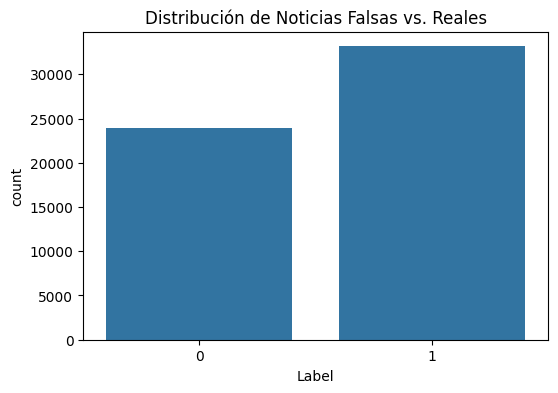

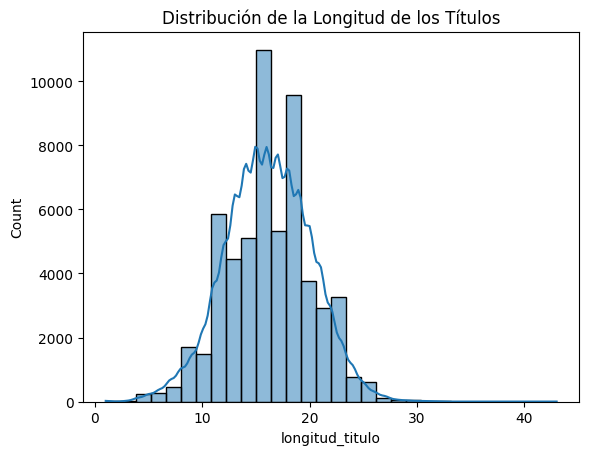

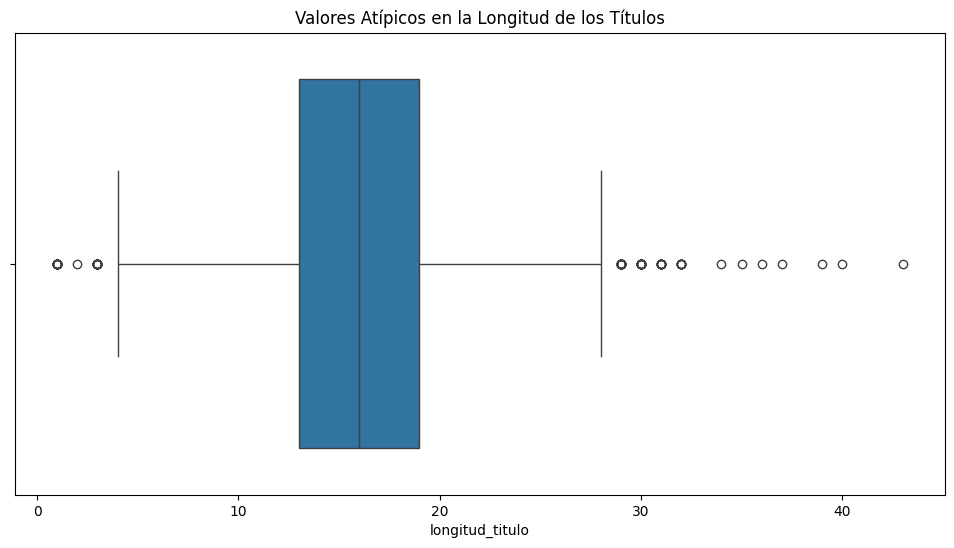

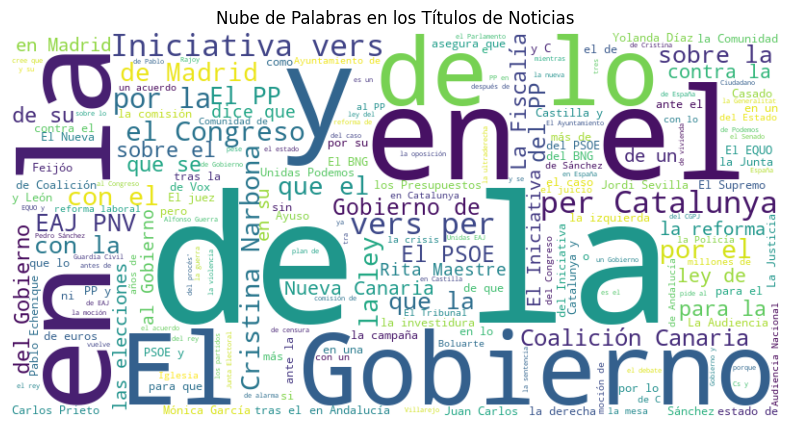

In [3]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas para variables numéricas:")
print(df_train.describe())

print("\nEstadísticas descriptivas para variables categóricas:")
print(df_train.describe(include=["O"]))

# Visualización de la variable objetivo
plt.figure(figsize=(6,4))
sns.countplot(x="Label", data=df_train)
plt.title("Distribución de Noticias Falsas vs. Reales")
plt.show()

# Análisis de la longitud de los títulos
df_train["longitud_titulo"] = df_train["Titulo"].apply(lambda x: len(str(x).split()))
sns.histplot(df_train["longitud_titulo"], bins=30, kde=True)
plt.title("Distribución de la Longitud de los Títulos")
plt.show()

# Identificación de valores atípicos
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_train["longitud_titulo"])
plt.title("Valores Atípicos en la Longitud de los Títulos")
plt.show()

# WordCloud para analizar palabras más frecuentes en los títulos
text = " ".join(df_train["Titulo"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras en los Títulos de Noticias")
plt.show()


## 2. Preparación de los Datos

En esta sección, realizamos la preparación de los datos asegurando su calidad y consistencia antes de ser utilizados en el modelo. Siguiendo los principios de calidad de datos, nos enfocamos en:

- **Completitud**: Manejo de valores nulos y eliminación de registros irrelevantes.
- **Unicidad**: Eliminación de duplicados en títulos y descripciones.
- **Consistencia**: Transformación de texto a formato uniforme (minúsculas, sin caracteres especiales).
- **Validez**: Conversión de variables a su tipo adecuado.
- **Adecuación**: Procesamiento específico para análisis de texto.

A continuación, aplicamos estas transformaciones.

In [4]:
df_train = df_train.dropna(subset=['Titulo'])

df_train = df_train.drop_duplicates(subset=['Titulo', 'Descripcion'])

# Calcular porcentaje de reducción correctamente
reduction_percentage = (1 - df_train.shape[0] / df_train_original.shape[0]) * 100
print(f"Se han eliminado aproximadamente {reduction_percentage:.2f}% de los datos.")

Se han eliminado aproximadamente 0.82% de los datos.


### 2.1 Normalización del Texto

Dado que nuestro modelo se basará en análisis de texto, es crucial limpiar y normalizar los datos. Aplicamos:

1. **Conversión a minúsculas**: Para evitar distinciones innecesarias entre palabras con mayúsculas o minúsculas.
2. **Eliminación de caracteres especiales y puntuación**: Para reducir ruido en los datos.
3. **Eliminación de stopwords**: Para eliminar palabras irrelevantes en la clasificación.
4. **Lematización**: Para convertir palabras a su forma raíz, mejorando la representación del texto.

A continuación, implementamos estos pasos.


In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Descargar recursos necesarios
nltk.download('stopwords')
nltk.download('punkt')

# Inicializar stopwords y el stemmer en español
stop_words = set(stopwords.words('spanish'))
stemmer = SnowballStemmer("spanish")

def limpiar_texto(texto):
    """Aplica limpieza y normalización a un texto."""
    if isinstance(texto, str):  # Verificar que el texto no sea NaN
        texto = texto.lower().strip()  # Minúsculas y eliminar espacios extra
        texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar signos de puntuación
        texto = re.sub(r'\s+', ' ', texto)  # Reemplazar múltiples espacios por uno solo
        palabras = texto.split()
        palabras = [stemmer.stem(word) for word in palabras if word not in stop_words]  # Aplicar stemming y remover stopwords
        return ' '.join(palabras)
    return ""

# Asegurar que no haya valores nulos antes de aplicar la limpieza
df_train['Titulo'] = df_train['Titulo'].fillna("")
df_train['Descripcion'] = df_train['Descripcion'].fillna("")

# Aplicar la función de limpieza a las columnas relevantes
df_train['Titulo'] = df_train['Titulo'].apply(limpiar_texto)
df_train['Descripcion'] = df_train['Descripcion'].apply(limpiar_texto)

# Verificamos los resultados en algunas filas
print(df_train[['Titulo', 'Descripcion']].head(10))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                              Titulo  \
0  the guardi va sanchez europ necesit apuest de ...   
1  revel gobiern negoci liber mirel cambi otorg p...   
2  ahor nunc joan fust estatut valencian cumpl 40...   
3  iglesi alient yoland diaz erc eh bildu negoci ...   
4      puigdemont ningun tragedi repeticion eleccion   
5    pnv consol mayor pse salv papel pp sig marginal   
6  exconsejer nuri marin pid indult cas ere enriquec   
7  fiscal pid prision incondicional siet cdr terr...   
8    jos manuel perez torner creador television educ   
9  ayusiz bng santiag abascal instru segu estel p...   

                                         Descripcion  
0  diari britan public pas juev editorial proxim ...  
1  revel gobiern negoci liber mirel cambi otorg p...  
2  valencian convoc castell fiest grand conmemor ...  
3  polit igual negoci empresari negoci grup parla...  
4  entrev punt avui lid jxcat desdramatiz posibl ...  
5  nacional consig alcald bilba donosti vitori so... 

### 2.2 Vectorización de Texto

Dado que los modelos de machine learning requieren datos numéricos, transformamos los textos en representaciones vectoriales utilizando:

- **TF-IDF (Term Frequency - Inverse Document Frequency)**: Método que pondera la importancia de las palabras en el conjunto de datos.
- **CountVectorizer**: Cuenta la frecuencia de aparición de las palabras.

Aquí implementamos la vectorización.


In [6]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Descargar stopwords en español si no están disponibles
nltk.download('stopwords')
from nltk.corpus import stopwords

# Lista de stopwords en español
spanish_stopwords = stopwords.words('spanish')

# Definir parámetros de vectorización optimizados
vectorizer_titulo = TfidfVectorizer(
    max_features=7000,         # Aumentamos las características más representativas
    ngram_range=(1,2),         # Incluimos unigramas y bigramas
    stop_words=spanish_stopwords  # Eliminamos stopwords en español
)

vectorizer_descripcion = TfidfVectorizer(
    max_features=7000,
    ngram_range=(1,2),
    stop_words=spanish_stopwords
)

# Aplicar vectorización
X_titulo = vectorizer_titulo.fit_transform(df_train['Titulo'])
X_descripcion = vectorizer_descripcion.fit_transform(df_train['Descripcion'])

# Concatenar ambas representaciones en una sola matriz de características
X = hstack([X_titulo, X_descripcion])
y = df_train['Label']

# Verificar dimensiones después de la transformación
print(f"Dimensiones de la matriz de características: {X.shape}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dimensiones de la matriz de características: (56597, 14000)


### 2.3 División en Conjuntos de Entrenamiento y Prueba

Para evaluar el desempeño del modelo, dividimos los datos en conjuntos de entrenamiento y prueba. Usamos un 80% de los datos para entrenar y el 20% restante para evaluar.


In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

# Asegurar que 'y' sea un array de numpy para evitar problemas en sklearn
y = np.array(y)  

# División en entrenamiento y prueba (80-20), manteniendo la distribución de clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verificar distribución de clases usando np.unique() ya que y_train es un ndarray
print("Distribución en el conjunto de entrenamiento:")
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Clase {u}: {c} registros ({c / len(y_train) * 100:.2f}%)")

print("\nDistribución en el conjunto de prueba:")
unique, counts = np.unique(y_test, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Clase {u}: {c} registros ({c / len(y_test) * 100:.2f}%)")

# Verificar dimensiones después de la partición
print(f"\nDimensiones del conjunto de entrenamiento: {X_train.shape}")
print(f"Dimensiones del conjunto de prueba: {X_test.shape}")

# Mostrar las primeras filas del dataframe de entrenamiento
df_train.head()



Distribución en el conjunto de entrenamiento:
Clase 0: 19088 registros (42.16%)
Clase 1: 26189 registros (57.84%)

Distribución en el conjunto de prueba:
Clase 0: 4772 registros (42.16%)
Clase 1: 6548 registros (57.84%)

Dimensiones del conjunto de entrenamiento: (45277, 14000)
Dimensiones del conjunto de prueba: (11320, 14000)


,ID,Label,Titulo,Descripcion,Fecha,longitud_titulo
0,ID,1,the guardi va sanchez europ necesit apuest de ...,diari britan public pas juev editorial proxim ...,2023-02-06,13
1,ID,0,revel gobiern negoci liber mirel cambi otorg p...,revel gobiern negoci liber mirel cambi otorg p...,2023-01-10,18
2,ID,1,ahor nunc joan fust estatut valencian cumpl 40...,valencian convoc castell fiest grand conmemor ...,NaT,14
3,ID,1,iglesi alient yoland diaz erc eh bildu negoci ...,polit igual negoci empresari negoci grup parla...,2022-03-01,18
4,ID,0,puigdemont ningun tragedi repeticion eleccion,entrev punt avui lid jxcat desdramatiz posibl ...,2018-09-03,10


## Conclusión de la Preparación de Datos

Después de completar esta fase, obtenemos datos limpios, transformados y adecuados para el modelado. Los pasos clave incluyeron:

- Eliminación de valores nulos y duplicados.
- Normalización del texto (minúsculas, eliminación de caracteres especiales, lematización).
- Vectorización de texto mediante **TF-IDF**.
- División en conjuntos de **entrenamiento y prueba**.

Ahora estamos listos para construir y evaluar nuestro modelo de clasificación.


## 3. Construcción de los Modelos

En esta sección implementaremos y evaluaremos diferentes modelos de clasificación para detectar noticias falsas. Se probarán los siguientes algoritmos:

- **Árboles de Decisión** (DecisionTreeClassifier) (Daniel Arias Monzon)
- **Naïve Bayes** (MultinomialNB) (Bryan Orjuela Melo)
- **Regresión Logística** (LogisticRegression) (Juan David Vasquez)

Cada modelo será entrenado y evaluado con las métricas de exactitud (*accuracy*), precisión (*precision*), recall y F1-score, además de analizar su matriz de confusión.



### 3.1 Modelado Random Forest (Daniel Arias Monzon)

En esta fase se realizará el entrenamiento y aprendizaje del modelo a partir del algoritmo random forest. Random Forest es un modelo de aprendizaje automático que combina múltiples árboles de decisión para mejorar la precisión y reducir el sobreajuste. Cada árbol se entrena con una muestra aleatoria de los datos y vota por la mejor predicción. En clasificación, gana la clase más votada, y en regresión, se promedian las predicciones. Su ventaja es su alta precisión y estabilidad, pero puede ser más lento y menos interpretable que un solo árbol de decisión.

#### 3.1.1 Transformar variables de texto en valores numericos 

Debido a que el modelo de random forest funciona con valores numericos, se debe transformar la informacion de texto a numeros para poder estudiarlos.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

# Descargar stopwords en español si no están disponibles
nltk.download('stopwords')
spanish_stopwords = stopwords.words('spanish')

# Inicializar el vectorizador con stopwords en español
vectorizer = TfidfVectorizer(max_features=5000, stop_words=spanish_stopwords)

# Aplicar la transformación a los textos
X_titulo = vectorizer.fit_transform(df_train["Titulo"])
X_descripcion = vectorizer.fit_transform(df_train["Descripcion"])

# Combinar ambas representaciones
import scipy.sparse as sp
X = sp.hstack((X_titulo, X_descripcion))

# Definir la variable objetivo
y = df_train["Label"]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 3.1.2 Entrenamiento del modelo Random Forest

Este código define y entrena un modelo de Random Forest para clasificación, se entrena con los datos de entrada y como resultado, se obtiene un modelo entrenado capaz de predecir etiquetas en nuevos datos basándose en patrones aprendidos.

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo con hiperparámetros básicos
modelo = RandomForestClassifier(n_estimators=100, random_state=42, 
                                max_depth=None, n_jobs=-1)

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

#### 3.1.3 Evaluación de métricas y matriz de confusión para Random Forest

Se evalúan el modelo calculando accuracy, que mide el porcentaje de predicciones correctas; el classification report, que incluye precisión, recall y F1-score para cada clase; y la matriz de confusión, que muestra visualmente los aciertos y errores del modelo.

Accuracy: 0.9266

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91      4772
           1       0.92      0.96      0.94      6548

    accuracy                           0.93     11320
   macro avg       0.93      0.92      0.92     11320
weighted avg       0.93      0.93      0.93     11320



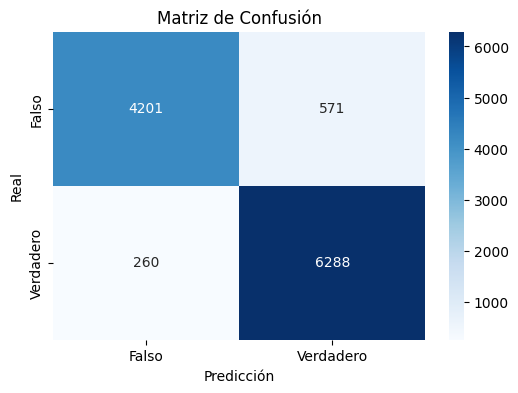

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Imprimir resultados
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Falso', 'Verdadero'], yticklabels=['Falso', 'Verdadero'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

El modelo alcanzó una precisión del 92.66%, demostrando un buen desempeño en la clasificación. La matriz de confusión muestra que la mayoría de las predicciones fueron correctas, con 4,201 verdaderos negativos y 6,288 verdaderos positivos, aunque hubo algunos errores, como 571 falsos positivos y 260 falsos negativos. El classification report indica un equilibrio entre precisión y recall, con un F1-score de 0.91 para la clase "Falso" y 0.94 para la clase "Verdadero". En general, el modelo presenta un ligero sesgo hacia la clase "Verdadero" pero sigue siendo altamente efectivo para la tarea.

#### 3.1.4 ROC-AUC para Evaluar la Separación de Clases en Random Forest

Se evalúa el modelo con la curva ROC (Receiver Operating Characteristic) y el AUC (Área Bajo la Curva). La curva ROC muestra el equilibrio entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) en diferentes umbrales de decisión. El AUC mide qué tan bien el modelo distingue entre clases, donde un valor cercano a 1 indica un excelente desempeño.

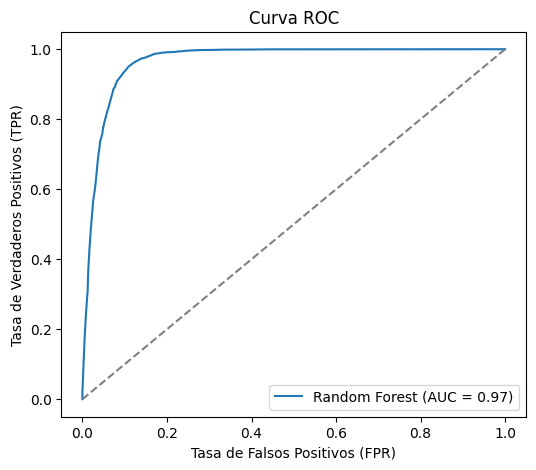

In [13]:
from sklearn.metrics import roc_curve, auc

# Obtener probabilidades de predicción para la clase positiva
y_probs = modelo.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar curva ROC
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Línea base
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.show()


La curva ROC obtenida muestra un excelente rendimiento del modelo, con un Área Bajo la Curva (AUC) de 0.97, lo que indica una alta capacidad para distinguir entre las clases. La curva se eleva rápidamente hacia la esquina superior izquierda, lo que refleja una alta tasa de verdaderos positivos (TPR) con una baja tasa de falsos positivos (FPR). Esto sugiere que el modelo clasifica correctamente la mayoría de los casos, con un buen balance entre sensibilidad y especificidad, confirmando su efectividad para la tarea de clasificación.

#### 3.1.5 Evaluación de Overfitting Random Forest

Este código calcula la exactitud (accuracy) del modelo en los conjuntos de entrenamiento y prueba. Compara las predicciones con las etiquetas reales y mide el porcentaje de aciertos en cada conjunto. 

In [15]:
from sklearn.metrics import accuracy_score

# Evaluar en entrenamiento y prueba
train_pred = modelo.predict(X_train)
test_pred = modelo.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f"Exactitud en entrenamiento: {train_acc:.3f}")
print(f"Exactitud en prueba: {test_acc:.3f}")


Exactitud en entrenamiento: 1.000
Exactitud en prueba: 0.927


Los resultados muestran que el modelo tiene una exactitud del 100% en el conjunto de entrenamiento, lo que sugiere un posible sobreajuste (overfitting), ya que ha aprendido perfectamente los datos con los que fue entrenado. Sin embargo, en el conjunto de prueba, la precisión baja a 92.7%, lo que sigue siendo un buen desempeño, pero indica que el modelo podría no generalizar perfectamente a nuevos datos. Esto sugiere que se podría mejorar la generalización ajustando hiperparámetros, como reduciendo la profundidad máxima de los árboles o aumentando la regularización.

#### 3.1.6 Optimizacion del modelo Random Forest

Se optimiza un modelo Random Forest usando Grid Search con validación cruzada para encontrar la mejor combinación de hiperparámetros. Prueba distintas configuraciones de profundidad, número de árboles y criterios de división, evaluando el rendimiento con F1-score en cinco particiones del conjunto de entrenamiento.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
rf = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [25, 50, 100, 200],       # Número de árboles
    'max_depth': [ 5, 10, 20, 40, 60],             # Profundidad máxima
    'min_samples_split': [5, 10, 20, 30],     # Mínimas muestras para dividir
    'min_samples_leaf': [1, 2, 5, 10],       # Mínimas muestras en cada hoja
    'max_features': ['sqrt', 'log2']      # Cantidad de features usadas en cada árbol
}

# Realizar Grid Search con validación cruzada
grid_search = GridSearchCV(
    rf, param_grid, cv=5, scoring="f1", n_jobs=-1, verbose=2
)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Evaluar el modelo con los mejores parámetros
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)


Fitting 5 folds for each of 640 candidates, totalling 3200 fits
Mejores parámetros encontrados: {'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


El Grid Search logra encontrar los parámetros más óptimos en el rango dado, y como se puede observar, lo logra con un tiempo elevado y aún limitando los rangos, por lo que en teoría se puede optimizar aún más el modelo pero se vuelve insostenible con los tiempos de carga. 

#### 3.1.7 Modelo con parametros optimizados

Con los parametros obtenidos del Grid Search se entrena con los hiperparámetros óptimos y se usa para hacer predicciones en el conjunto de prueba, mejorando la precisión y reduciendo el riesgo de sobreajuste.

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo con hiperparámetros básicos
modeloOpt = RandomForestClassifier(
    max_depth=1000,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=5000,
    random_state=42  
)

# Entrenar el modelo con los datos de entrenamiento
modeloOpt.fit(X_train, y_train)



RandomForestClassifier(max_depth=1000, min_samples_split=10, n_estimators=5000,
                       random_state=42)

Siguiendo con los problemas de tiempo de carga, podemos notar como con parámetros más optimizados el tiempo aumenta demasiado, llegando en este caso a mas de media hora para cargar, cuando la instancia inicial del random forest que se utilizó cargaba en un par de segundos. 

#### 3.1.8 Evaluación de métricas y matriz de confusión modelo optimizado

Se realiza la evaluación de las métricas y matriz de cofusión al modelo optimizado de la misma manera que se hizo con el modelo base. 

Accuracy: 0.9288

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      4772
           1       0.92      0.97      0.94      6548

    accuracy                           0.93     11320
   macro avg       0.93      0.92      0.93     11320
weighted avg       0.93      0.93      0.93     11320



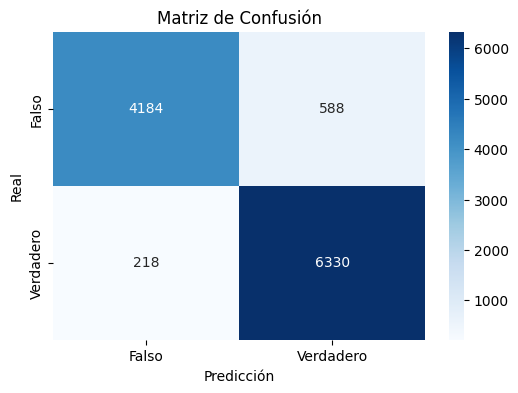

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de prueba
y_pred = modeloOpt.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Imprimir resultados
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Falso', 'Verdadero'], yticklabels=['Falso', 'Verdadero'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

El modelo optimizado de Random Forest alcanzó una precisión del 92.88%, mejorando ligeramente con respecto al modelo anterior. La matriz de confusión muestra una reducción en los errores, con menos falsos negativos (218) y falsos positivos (588), lo que indica una mejor capacidad de clasificación. El classification report refleja un equilibrio entre precisión y recall, con un F1-score de 0.91 para noticias falsas y 0.94 para noticias verdaderas. En general, el modelo es más efectivo en la detección de noticias verdaderas sin comprometer la identificación de noticias falsas.

#### 3.1.9 Evaluación de Overfitting modelo optimizado

Se realiza el mismo análisis de accuracy en entrenamiento y pruebas para evaluar si tiene sobre ajuste.

In [38]:
from sklearn.metrics import accuracy_score

# Evaluar en entrenamiento y prueba
train_pred = modeloOpt.predict(X_train)
test_pred = modeloOpt.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f"Exactitud en entrenamiento: {train_acc:.3f}")
print(f"Exactitud en prueba: {test_acc:.3f}")


Exactitud en entrenamiento: 0.993
Exactitud en prueba: 0.929


Los resultados muestran que el modelo optimizado tiene una exactitud del 99.3% en el conjunto de entrenamiento y 92.9% en el conjunto de prueba.
Este comportamiento indica que el modelo ha sido mejor regularizado, ya que aunque la precisión en entrenamiento sigue siendo alta, no es del 100% como en el modelo anterior, lo que sugiere una menor sobreadaptación a los datos de entrenamiento, sin embargo, presenta comportamiento de sobre ajuste aún. 

#### 3.1.10 Extracción de las palabras de mayor peso para la clasificación de noticias falsas

Se extrae la importancia de cada palabra, ordena las más relevantes y genera un gráfico de barras que muestra las 20 palabras con mayor peso en la clasificación, permitiendo interpretar qué términos influyen más en las predicciones del modelo.

C:\Users\danie\AppData\Local\Temp\ipykernel_16448\3088206519.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette="viridis")


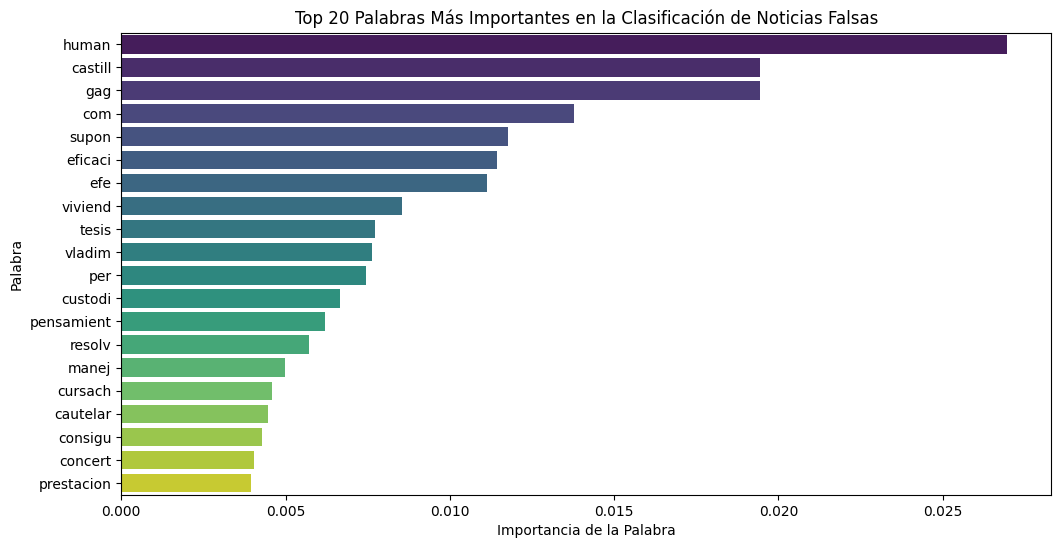

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# Obtener la importancia de las palabras
feature_importances = modeloOpt.feature_importances_
feature_names = np.array(vectorizer.get_feature_names_out())  # Convertir a array para acceso seguro

# Verificar que las dimensiones coincidan
if len(feature_importances) != len(feature_names):
    min_length = min(len(feature_importances), len(feature_names))
    feature_importances = feature_importances[:min_length]  # Ajustar tamaño
    feature_names = feature_names[:min_length]  

# Ordenar palabras por importancia
sorted_indices = np.argsort(feature_importances)[::-1]  # Índices ordenados de mayor a menor

top_n = min(20, len(feature_names))  # Asegurar que no exceda el número real de palabras

# Seleccionar las N palabras más importantes
top_features = feature_names[sorted_indices[:top_n]]
top_importances = feature_importances[sorted_indices[:top_n]]

# Graficar los resultados
plt.figure(figsize=(12, 6))
sns.barplot(x=top_importances, y=top_features, palette="viridis")
plt.xlabel("Importancia de la Palabra")
plt.ylabel("Palabra")
plt.title("Top 20 Palabras Más Importantes en la Clasificación de Noticias Falsas")
plt.show()





### 3.2 Modelo Naïve Bayes (Bryan Orjuela Melo)

El modelo **Naïve Bayes Multinomial** es adecuado para problemas de clasificación de texto, ya que se basa en la probabilidad de que una palabra aparezca en un documento dado su categoría. Utilizaremos la variante **MultinomialNB**, ajustando el hiperparámetro **alpha** para evitar problemas de sobreajuste o subajuste.


#### 3.2.1 Entrenamiento del modelo Naïve Bayes

Se prueba diferentes valores de alpha, entrena un modelo con cada uno y mide su exactitud en los datos de prueba. Luego, selecciona el alpha con mejor rendimiento y entrena un modelo final con este valor, asegurando una mejor precisión en la clasificación de noticias falsas.

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de valores de alpha a probar
alpha_values = [0.01, 0.1, 0.5, 1, 2, 5]

best_alpha = None
best_accuracy = 0

for alpha in alpha_values:
    # Entrenar el modelo con el alpha actual
    nb_model = MultinomialNB(alpha=alpha)
    nb_model.fit(X_train, y_train)

    # Predicción sobre el conjunto de prueba
    y_pred = nb_model.predict(X_test)
    
    # Calcular exactitud
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Alpha: {alpha} - Exactitud: {accuracy:.4f}")

    # Guardar el mejor modelo
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_alpha = alpha

# Mostrar el mejor alpha encontrado
print(f"\nMejor valor de alpha: {best_alpha} con exactitud de {best_accuracy:.4f}")

# Entrenar el modelo con el mejor alpha
nb_best = MultinomialNB(alpha=best_alpha)
nb_best.fit(X_train, y_train)

# Predicción final
y_pred_best = nb_best.predict(X_test)



Alpha: 0.01 - Exactitud: 0.8994
Alpha: 0.1 - Exactitud: 0.8969
Alpha: 0.5 - Exactitud: 0.8920
Alpha: 1 - Exactitud: 0.8895
Alpha: 2 - Exactitud: 0.8843
Alpha: 5 - Exactitud: 0.8727

Mejor valor de alpha: 0.01 con exactitud de 0.8994


El modelo de Naive Bayes Multinomial logra su mejor desempeño con alpha = 0.01, alcanzando una exactitud del 89.94% en los datos de prueba. A medida que el valor de alpha aumenta, la precisión disminuye progresivamente, lo que indica que una mayor suavización reduce la capacidad del modelo para capturar patrones relevantes en los datos.

#### 3.2.2 Evaluación del modelo Naïve Bayes

Se busca evaluar el rendimiento del modelo de Naive Bayes con el mejor valor de alpha encontrado. Para ello, genera un reporte de clasificación, mostrando métricas como precisión, recall y f1-score. Además, visualiza la matriz de confusión para analizar cómo el modelo clasifica correctamente y dónde comete errores


Reporte de Clasificación con el Mejor Alpha:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      4772
           1       0.87      0.97      0.92      6548

    accuracy                           0.90     11320
   macro avg       0.91      0.89      0.89     11320
weighted avg       0.90      0.90      0.90     11320



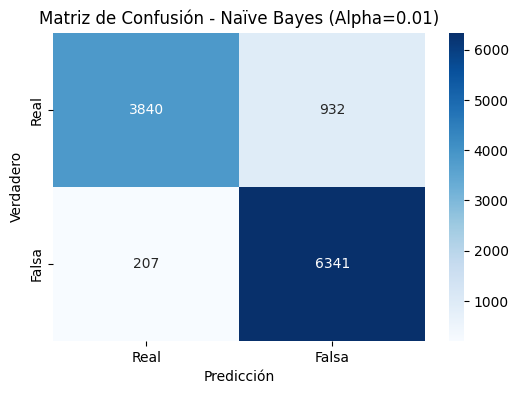

In [45]:
# Reporte de clasificación
print("\nReporte de Clasificación con el Mejor Alpha:")
print(classification_report(y_test, y_pred_best))

# Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Falsa"], yticklabels=["Real", "Falsa"])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title(f"Matriz de Confusión - Naïve Bayes (Alpha={best_alpha})")
plt.show()

El modelo de Naive Bayes con un alpha de 0.01 obtuvo una precisión del 90%, mostrando un alto desempeño en la detección de noticias falsas con un recall del 97% en la clase positiva. Sin embargo, en la clasificación de noticias reales, el recall es menor (80%), indicando que el modelo tiende a confundir algunas noticias reales como falsas.

#### 3.2.3 Evaluación de sobreajuste en el modelo Naive Bayes

Se calcula la exactitud en ambos conjuntos y determina si hay sobreajuste o subajuste. Luego, genera matrices de confusión para visualizar los errores en ambas fases y muestra reportes de clasificación con métricas como precisión, recall y f1-score. 

Exactitud en entrenamiento: 0.9179
Exactitud en prueba: 0.8994

El modelo tiene un buen ajuste, sin grandes diferencias entre entrenamiento y prueba.


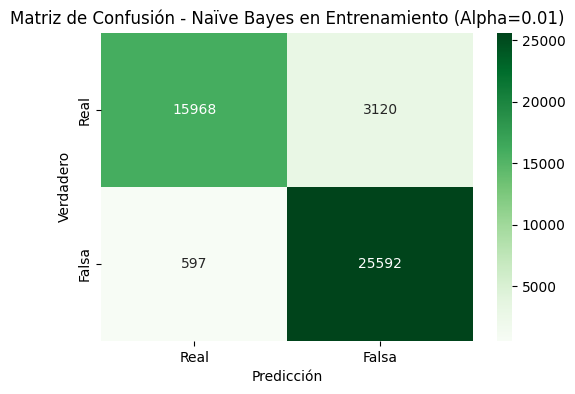

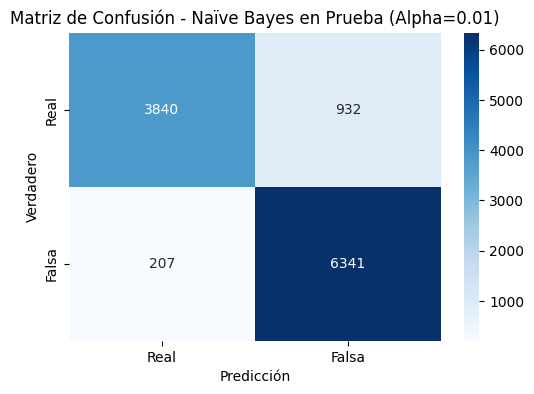


Reporte de Clasificación en Entrenamiento:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90     19088
           1       0.89      0.98      0.93     26189

    accuracy                           0.92     45277
   macro avg       0.93      0.91      0.91     45277
weighted avg       0.92      0.92      0.92     45277


Reporte de Clasificación en Prueba:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      4772
           1       0.87      0.97      0.92      6548

    accuracy                           0.90     11320
   macro avg       0.91      0.89      0.89     11320
weighted avg       0.90      0.90      0.90     11320



In [59]:
# Predicciones en el conjunto de entrenamiento
y_train_pred = nb_best.predict(X_train)

# Calcular exactitud en entrenamiento y prueba
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred_best)

# Imprimir resultados
print(f"Exactitud en entrenamiento: {train_accuracy:.4f}")
print(f"Exactitud en prueba: {test_accuracy:.4f}")

# Evaluar si hay sobreajuste o subajuste
if train_accuracy > test_accuracy + 0.05:
    print("\nPosible sobreajuste: el modelo funciona mejor en entrenamiento que en prueba.")
elif test_accuracy > train_accuracy + 0.05:
    print("\nPosible subajuste: el modelo no logra capturar bien los patrones en entrenamiento.")
else:
    print("\nEl modelo tiene un buen ajuste, sin grandes diferencias entre entrenamiento y prueba.")

# Matriz de confusión en entrenamiento
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="d", cmap="Greens", xticklabels=["Real", "Falsa"], yticklabels=["Real", "Falsa"])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title(f"Matriz de Confusión - Naïve Bayes en Entrenamiento (Alpha={best_alpha})")
plt.show()

# Matriz de confusión en prueba
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Falsa"], yticklabels=["Real", "Falsa"])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title(f"Matriz de Confusión - Naïve Bayes en Prueba (Alpha={best_alpha})")
plt.show()

# Reporte de clasificación en entrenamiento
print("\nReporte de Clasificación en Entrenamiento:")
print(classification_report(y_train, y_train_pred))

# Reporte de clasificación en prueba
print("\nReporte de Clasificación en Prueba:")
print(classification_report(y_test, y_pred_best))


Se muestra un buen desempeño con una exactitud del 91.79% en entrenamiento y 89.94% en prueba, indicando que generaliza bien a nuevos datos. La diferencia entre ambas métricas es pequeña, lo que sugiere que no hay un problema significativo de sobreajuste ni subajuste.

#### 3.2.4 Extraccion palabras claves de noticias reales y falsas con Naïve Bayes

Después de entrenar el modelo de **Naïve Bayes**, es importante comprender qué palabras tienen mayor influencia en la clasificación de noticias reales y falsas. Para esto, analizamos las log-probabilidades de las palabras dentro del modelo.

El proceso consiste en:
1. Obtener la lista de palabras utilizadas por el vectorizador TF-IDF.
2. Extraer los coeficientes del modelo de Naïve Bayes, los cuales reflejan la probabilidad de que una palabra aparezca en cada categoría (*real o falsa*).
3. Seleccionar las **20 palabras más influyentes** en cada clase.

Este análisis nos permite identificar patrones en el lenguaje de las noticias falsas y reales. Esto es útil tanto para entender el modelo como para detectar posibles sesgos en los datos.

In [46]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Verificar la cantidad de palabras en el vectorizador
num_features = X_train.shape[1]
print(f"Número de características en el vectorizador: {num_features}")

# Entrenar el modelo de Naïve Bayes
clf = MultinomialNB(alpha=0.01)  # Usa el mejor alpha encontrado
clf.fit(X_train, y_train)

# Obtener las características (palabras) del vectorizador
feature_names = np.array(vectorizer_titulo.get_feature_names_out())  # Convertir a NumPy array para indexado seguro

# Obtener los coeficientes del modelo Naïve Bayes (log-probabilidades de las palabras)
class_log_probs = clf.feature_log_prob_

# Identificar las palabras más influyentes en cada clase
num_top_words = 20  # Número de palabras más representativas

# Asegurar que seleccionamos solo índices válidos
top_real_indices = np.argsort(class_log_probs[0])[-num_top_words:]
top_real_indices = [i for i in top_real_indices if i < len(feature_names)]
top_real_words = feature_names[top_real_indices]

top_fake_indices = np.argsort(class_log_probs[1])[-num_top_words:]
top_fake_indices = [i for i in top_fake_indices if i < len(feature_names)]
top_fake_words = feature_names[top_fake_indices]

# Mostrar resultados
print("Palabras más representativas de noticias reales:")
print(", ".join(top_real_words))

print("\nPalabras más representativas de noticias falsas:")
print(", ".join(top_fake_words))


Número de características en el vectorizador: 14000
Palabras más representativas de noticias reales:
canari, equ, per cataluny, inici vers, vers per, vers, gobiern, inici, per, cataluny

Palabras más representativas de noticias falsas:
madr, vox, cas, pso, pod, sanchez, gobiern, pp


### 3.3 Modelo de clasificación con gradiente estocástico (Juan David Vasquez)

Un modelo de clasificación con gradiente estocástico se basa en la optimización mediante descenso de gradiente estocástico (SGD), una técnica que ajusta los pesos del modelo iterativamente utilizando ejemplos individuales o pequeños lotes de datos en lugar de todo el conjunto de entrenamiento. Esto permite una actualización más rápida y eficiente, especialmente en grandes volúmenes de datos.

#### 3.3.1 Entrenamiento de un modelo de clasificación con gradiente estocástico

En esta sección, realizaremos el entrenamiento de un modelo de clasificación con gradiente estocástico para la clasificación de noticias verdaderas y noticias falsas. Para esto el primer paso será usar los datos de entrenamiento para la preparación del modelo usando la representación TfIdf.

In [48]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

SGDClassifier()

#### 3.3.2 Evaluación de las métricas del modelo con gradiente estocástico

A partir del modelo entrenado, se procederán a evaluar las métricas del valor de la precisión y el F1-Score para determinar qué tan bien se realiza la tarea de clasificar noticias verdaderas y falsas.

In [ ]:
predictions_train = sgd_model.predict(X_train)
predictions_test = sgd_model.predict(X_test)
print("Logistic Regression validation accuracy scores")
print("Accuracy train:",accuracy_score(y_train, predictions_train))
print("Accuracy test:",accuracy_score(y_test, predictions_test),"\n")
print(classification_report(y_test, predictions_test, digits=4))

Logistic Regression validation accuracy scores
Accuracy train: 0.9201802239547673
Accuracy test: 0.9022084805653711 

              precision    recall  f1-score   support

           0     0.9688    0.7936    0.8725      4772
           1     0.8671    0.9814    0.9207      6548

    accuracy                         0.9022     11320
   macro avg     0.9179    0.8875    0.8966     11320
weighted avg     0.9100    0.9022    0.9004     11320



Como se observa, en general, el modelo tiene una buena precisión mayor al 90% y un buen puntaje F1 de 0.901. Esto implica que el modelo es capaz de exponer en la mayor parte de los casos cuándo las noticias son falsas.

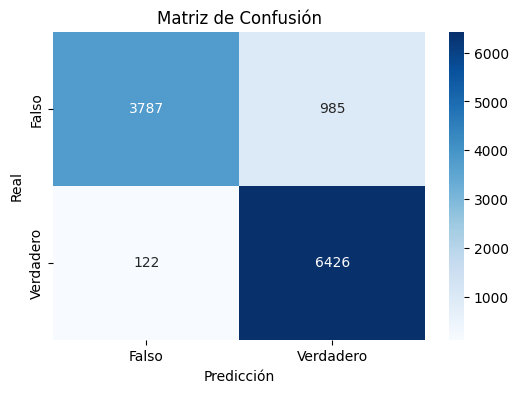

In [50]:
#Visualizar matriz de confusión
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, predictions_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Falso', 'Verdadero'], yticklabels=['Falso', 'Verdadero'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

#### 3.3.3 Extracción de las palabras de mayor peso para la clasificación de noticias falsas

Debido a la naturaleza del modelo de gradiente estocástico, es posible extraer las características de los cuerpos de noticias que nos ayudan a determinar con mayor certeza que una noticia es falsa o verdadera.

In [52]:
coefficients = sgd_model.coef_ # Extraemos los coeficientes del modelo de regresión lineal
top_n = 20 #Solo se tomará la mitad, esto debido a que el modelo tiene títulos y descripción de la noticia por separado, lo cual duplica el número de coeficientes
words1 = vectorizer_titulo.get_feature_names_out()  # Obtener las palabras del vectorizador
words2 = vectorizer_descripcion.get_feature_names_out()
words = np.hstack((words1, words2))
for i, group in enumerate(sgd_model.classes_):
    print(f"\nMost important words for group '{group}':")
    # Obtenemos los índices de los coeficientes más altos
    if group == '1':
        top_indices = np.argsort(coefficients[0])[-top_n:]
    else:
        top_indices = np.argsort(coefficients[0])[:top_n]
    # Mostramos las palabras correspondientes a esos índices
    top = []
    for index in top_indices:
        top.append(index)

    selected_words = []
    while len(selected_words) < 10:
        idx = top.pop()
        word = words[idx]
        if (word not in selected_words):
            selected_words.append(word)
            print(f"{word}: {coefficients[0][idx]}")


Most important words for group '0':
pabl echeniqu: -3.0226474461475767
cristin narbon: -3.057613154085256
narbon: -3.1936069934823137
boluart: -3.2448210780613964
nuev canari: -3.540401661356366
canari: -3.56733140613285
jordi sevill: -3.64486615903882
coalicion canari: -3.6479208905612834
calviñ: -3.6877271531927467
unid pp: -3.689887845154296

Most important words for group '1':
pabl echeniqu: -3.0226474461475767
cristin narbon: -3.057613154085256
narbon: -3.1936069934823137
boluart: -3.2448210780613964
nuev canari: -3.540401661356366
canari: -3.56733140613285
jordi sevill: -3.64486615903882
coalicion canari: -3.6479208905612834
calviñ: -3.6877271531927467
unid pp: -3.689887845154296


#### 3.3.4 Prueba de entrenamiento de un modelo de clasificación con gradiente estocástico sin división por título y descripción

En esta sección, realizaremos el entrenamiento de un modelo similar sin dividir la representación por título y descripción para observar los resultados obtenidos sino juntando esta información para cada texto. Para esto el primer paso será preparar los datos sobre los que previamente se realizó una limpieza y se dividirán los conjuntos de entrenamiento y validación.

In [53]:
df_combined = df_train['Titulo']+ ' ' + df_train['Descripcion']

vectorizer= TfidfVectorizer(
    max_features=7000,         # Aumentamos las características más representativas
    ngram_range=(1,2),         # Incluimos unigramas y bigramas
    stop_words=spanish_stopwords  # Eliminamos stopwords en español
)
X_combined = vectorizer.fit_transform(df_combined)

# Verificar dimensiones después de la transformación
print(f"Dimensiones de la matriz de características: {X_combined.shape}")

Dimensiones de la matriz de características: (56597, 7000)


In [54]:
# División en entrenamiento y prueba (80-20), manteniendo la distribución de clases
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

# Verificar distribución de clases usando np.unique() ya que y_train es un ndarray
print("Distribución en el conjunto de entrenamiento:")
unique, counts = np.unique(y_train_p, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Clase {u}: {c} registros ({c / len(y_train_p) * 100:.2f}%)")

print("\nDistribución en el conjunto de prueba:")
unique, counts = np.unique(y_test_p, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Clase {u}: {c} registros ({c / len(y_test_p) * 100:.2f}%)")

# Verificar dimensiones después de la partición
print(f"\nDimensiones del conjunto de entrenamiento: {X_train_p.shape}")
print(f"Dimensiones del conjunto de prueba: {X_test_p.shape}")

# Mostrar las primeras filas del dataframe de entrenamiento
df_combined.head()

Distribución en el conjunto de entrenamiento:
Clase 0: 19088 registros (42.16%)
Clase 1: 26189 registros (57.84%)

Distribución en el conjunto de prueba:
Clase 0: 4772 registros (42.16%)
Clase 1: 6548 registros (57.84%)

Dimensiones del conjunto de entrenamiento: (45277, 7000)
Dimensiones del conjunto de prueba: (11320, 7000)


0    the guardi va sanchez europ necesit apuest de ...
1    revel gobiern negoci liber mirel cambi otorg p...
2    ahor nunc joan fust estatut valencian cumpl 40...
3    iglesi alient yoland diaz erc eh bildu negoci ...
4    puigdemont ningun tragedi repeticion eleccion ...
dtype: object

#### 3.3.5 Evaluación de las métricas del modelo

A partir del modelo entrenado, se procederán a evaluar las métricas del valor de la precisión y el F1-Score para determinar qué tan bien se realiza la tarea de clasificar noticias verdaderas y falsas con este cambio sobre el modelo.

Stochastic Gradient Descent validation accuracy scores
Accuracy train: 0.9090487443956092
Accuracy test: 0.8986749116607774 

Stochastic Gradient Descent classification report
              precision    recall  f1-score   support

           0     0.9756    0.7791    0.8664      4772
           1     0.8596    0.9858    0.9184      6548

    accuracy                         0.8987     11320
   macro avg     0.9176    0.8825    0.8924     11320
weighted avg     0.9085    0.8987    0.8965     11320



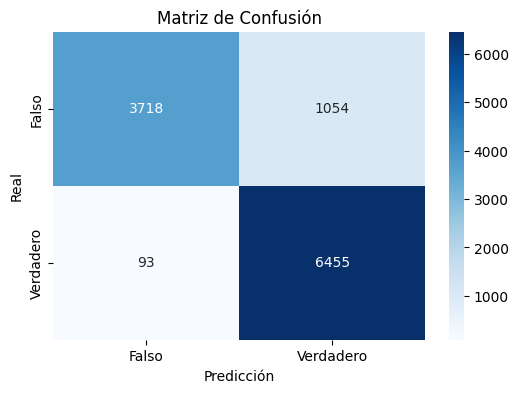

In [55]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

sgd_model_p = SGDClassifier()
sgd_model_p.fit(X_train_p, y_train_p)
predictions_train_p = sgd_model_p.predict(X_train_p)
predictions_test_p = sgd_model_p.predict(X_test_p)
print("Stochastic Gradient Descent validation accuracy scores")
print("Accuracy train:",accuracy_score(y_train_p, predictions_train_p))
print("Accuracy test:",accuracy_score(y_test_p, predictions_test_p),"\n")
print("Stochastic Gradient Descent classification report")
print(classification_report(y_test_p, predictions_test_p, digits=4))

#Visualizar matriz de confusión
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test_p, predictions_test_p)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Falso', 'Verdadero'], yticklabels=['Falso', 'Verdadero'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

Como se observa, las métricas de evaluación para la precisión y el puntaje F-1 se han reducido al disminuir la representación separada del título y la descripción y dejar toda esta información en un único dato para cada texto. Por ende, el mejor modelo sigue proviniendo de mantener ambos datos por separado.

#### 3.3.6 Extracción de las palabras de mayor peso para la clasificación de noticias falsas con el modelo de prueba

Nuevamente, es posible extraer las características de los cuerpos de noticias que nos ayudan a determinar con mayor certeza que una noticia es falsa o verdadera para el nuevo modelo.

In [56]:
coefficients = sgd_model_p.coef_ # Extraemos los coeficientes del modelo de regresión lineal
top_n = 10
words = vectorizer.get_feature_names_out()  
for i, group in enumerate(sgd_model_p.classes_):
    print(f"\nMost important words for group '{group}':")
    # Obtenemos los índices de los coeficientes más altos
    if group == '1':
        top_indices = np.argsort(coefficients[0])[-top_n:]
    else:
        top_indices = np.argsort(coefficients[0])[:top_n]
    # Mostramos las palabras correspondientes a esos índices
    for idx in top_indices:
        print(f"{words[idx]}: {coefficients[0][idx]}")


Most important words for group '0':
equ: -12.212053129500807
eajpnv: -10.119267196658962
bng: -9.737135095357843
unid pp: -6.115768548628711
nuev canari: -5.703483543790898
canari: -5.649489024086702
jordi sevill: -5.321549499342527
coalicion canari: -5.093478724385759
cristin narbon: -5.040475788434684
narbon: -4.938575526928502

Most important words for group '1':
equ: -12.212053129500807
eajpnv: -10.119267196658962
bng: -9.737135095357843
unid pp: -6.115768548628711
nuev canari: -5.703483543790898
canari: -5.649489024086702
jordi sevill: -5.321549499342527
coalicion canari: -5.093478724385759
cristin narbon: -5.040475788434684
narbon: -4.938575526928502


Como se observa, las palabras más importantes para la clasificación varían según la representación de cada documento en título y descripción por separado, o en solo un texto con toda la información (reduciendo en esta última la relevancia del título para una noticia falsa).

## **4. Selección de modelo de clasificación por gradiente estocástica**

Tras evaluar distintos modelos de clasificación, se determinó que el modelo de gradiente estocástico (SGDClassifier) era la mejor opción. Aunque Random Forest mostró un buen desempeño, fue descartado debido a sus elevados tiempos de carga y su tendencia al sobreajuste, lo que comprometía su capacidad de generalización. Por otro lado, Naive Bayes (MultinomialNB) resultó ser un modelo rápido y eficiente para la clasificación de texto, pero suposiciones como la independencia condicional entre variables limitaron su capacidad predictiva en nuestro conjunto de datos. En contraste, el modelo de gradiente estocástico equilibró eficiencia computacional y rendimiento, permitiendo manejar grandes volúmenes de datos sin sobreajuste y manteniendo una capacidad de generalización superior.

## **5. Persistencia del modelo**

A continuación, se guardará el modelo en un archivo .joblib tal como si se fuese a dejar en producción para su posterior análisis y validación.

In [57]:
from joblib import dump, load

filename = "model.joblib"
dump(sgd_model, filename)

['model.joblib']

## **6. Resultado sobre el conjunto de validación y exportación**

Finalmente, se usará el modelo para predecir los datos sobre el conjunto de validación y se exportarán los datos como un nuevo archivo .csv con labels.

In [58]:
# Definir parámetros de vectorización optimizados
vectorizer_titulo_test = TfidfVectorizer(
    max_features=7000,         # Aumentamos las características más representativas
    ngram_range=(1,2),         # Incluimos unigramas y bigramas
    stop_words=spanish_stopwords  # Eliminamos stopwords en español
)

vectorizer_descripcion_test = TfidfVectorizer(
    max_features=7000,
    ngram_range=(1,2),
    stop_words=spanish_stopwords
)

# Asegurar que no haya valores nulos antes de aplicar la limpieza
df_test['Titulo'] = df_test['Titulo'].fillna("")
df_test['Descripcion'] = df_test['Descripcion'].fillna("")

# Aplicar la función de limpieza a las columnas relevantes
df_test['Titulo'] = df_test['Titulo'].apply(limpiar_texto)
df_test['Descripcion'] = df_test['Descripcion'].apply(limpiar_texto)

# Aplicar vectorización
X_titulo_test = vectorizer_titulo_test.fit_transform(df_test['Titulo'])
X_descripcion_test = vectorizer_descripcion_test.fit_transform(df_test['Descripcion'])

# Concatenar ambas representaciones en una sola matriz de características
X_validation = hstack([X_titulo_test, X_descripcion_test])

loaded_model = load(filename)
results = loaded_model.predict(X_validation)
df_test_original.insert(1, 'Label', results)

# Exportar a CSV
df_test_original.to_csv("fake_news_test_withlabels.csv", index=False)